In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Visualizations

In [2]:
df = pd.read_csv('data/Complete_Data/All_Four_Datasets.csv')
df['Date']=pd.to_datetime(df['Date']).dt.date


In [3]:
#Import Data
washington_loc = [38.907, -77.036]
crime_sets = dict()
for year in range(2010,2019):
    crime_sets[str(year)] = pd.read_csv('data/crime/USA_Crime_Incidents_in_{}.csv'.format(year))
    
crime_merged = pd.concat(crime_sets)
offense_types = list(set(crime_merged['OFFENSE']))


We will explore both the processed dataset and the raw data. 

Text(0, 0.5, 'Total Count')

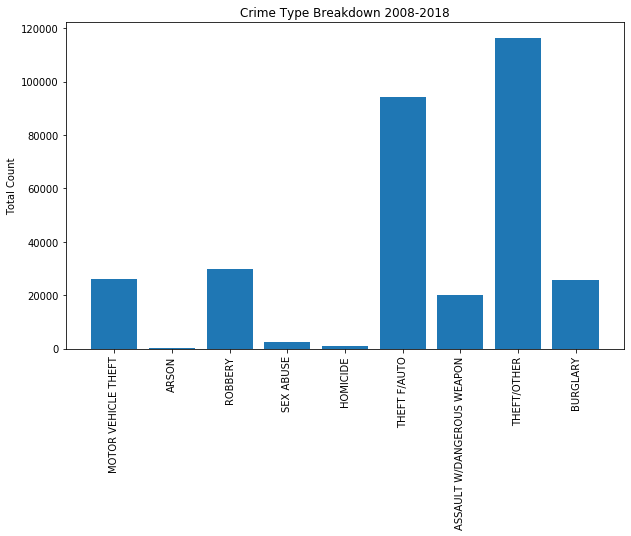

In [4]:
totals = []
for o in offense_types:
    totals.append(df[o].sum())

plt.figure(figsize=(10,6))
plt.bar(offense_types, totals)
plt.xticks(rotation='90')
plt.title("Crime Type Breakdown 2008-2018")
plt.ylabel("Total Count")

Most frequent offenses are theft, burglary or robbery. Assault with a dangerous weapon is moderate. Homicide arson and sex abuse are significantly less common.

Text(0.5, 1.0, 'Total Crime Distribution by Day of Week')

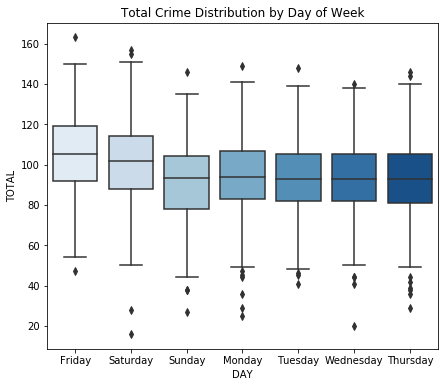

In [5]:
plt.figure(figsize=(7,6))
p = sns.boxplot(x='DAY', y='TOTAL',data=df, palette='Blues')
p.set_title("Total Crime Distribution by Day of Week")

Clear weekly patterns in the data. Higher crime rates occur on friday and saturday. Most weekdays appear the same. Lowest mean crime occurs on Sunday.


C:\Users\suhas\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Crimes Per Day 2010-2018')

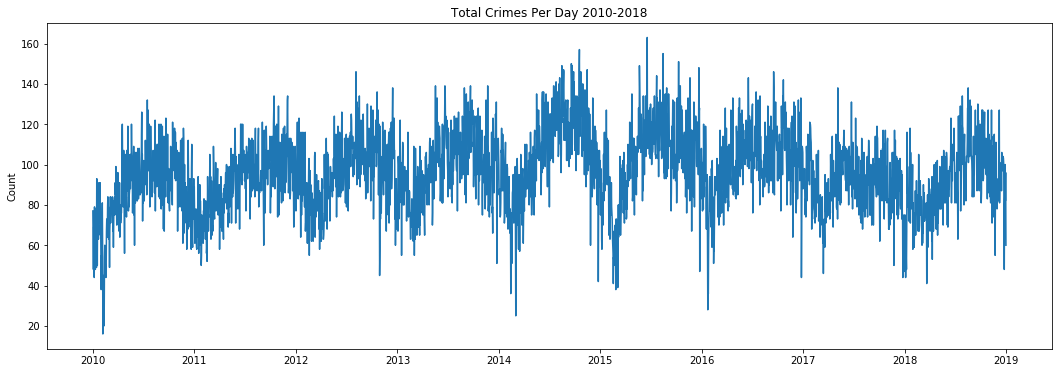

In [6]:
plt.figure(figsize=(18,6))
plt.plot( df['Date'], df['TOTAL'])
plt.ylabel("Count")
plt.title("Total Crimes Per Day 2010-2018")

Clear seasonal pattern is evident in the time series of total crimes per day over the 8 year period. There also is some evidence of weekly or monthly patterns.

Text(0.5, 0.98, 'Total Crime vs Weather Variables')

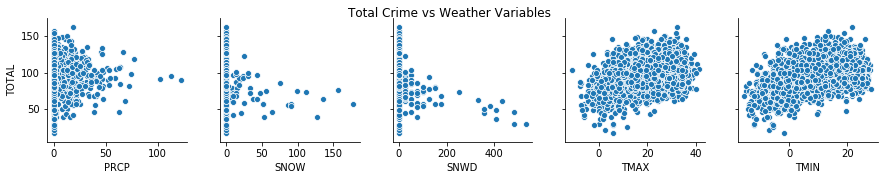

In [7]:

g = sns.pairplot(data=df, x_vars = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], y_vars=['TOTAL'], kind="scatter")
g.fig.suptitle("Total Crime vs Weather Variables")

Some potential relationships aparrent in the pairplot of total crime vs weather variables.